Assignment 3 (due on 11/22)

Student:蒙芳秀（12331305），Gtihub：mengfangxiu

批改人：赵淑慧

得分：31/60

In [1]:
# Load modules
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt



# PS1. Niño 3.4 index  
12/20  
1. Niño 3.4范围正确，计算月度气候态（多年平均每月）的SST，并获取SST距平。——经度范围应切片lon=slice(190,240)；月度气候态不是区域平均SST的时间序列，还需要根据月份分组计算，见参考代码。6/10
2. 根据厄尔尼诺和拉尼娜事件定义，模仿例图（x轴月尺度时间，y轴温度距平，黑线表示三个月滑动平均的距平值，红柱表示正距平，蓝柱表示负距平，有两种事件的阈值水平线）进行绘图。——所选数据不正确，应该用上一题所得的SST距平来做滑动平均；缺少3个月滑动平均的曲线；图片缺少图例。6/10

1. Niño 3.4 index
The Niño 3.4 anomalies may be thought of as representing the average equatorial sea surface temperatures (SSTs) across the Pacific from about the dateline to the South American coast (5N-5S, 170W-120W). The Niño 3.4 index typically uses a 3-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.5°C for a period of 5 months or more. Check Equatorial Pacific Sea Surface Temperatures for more about the Niño 3.4 index.

1.1 [10 points] Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.


In [2]:

# Load the netCDF4 file
ds = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# Check the data
ds
# Using the slice method to find a nearby value  SST from Niño 3.4 region
sst_nino=ds.sst.sel(lat=slice(-5, 5),lon=slice(10, 60))
sst_nino_mean=sst_nino.mean(dim=['lat', 'lon']);
# subtract climatology from SST time series to obtain anomalies
sst_anom=sst_nino-sst_nino_mean
sst_anom


<xarray.DataArray 'sst' (time: 684, lat: 5, lon: 26)>
array([[[-0.23072624, -0.27137756,         nan, ...,  0.77036476,
          0.69953156,  0.683218  ],
        [-0.00307465,         nan,         nan, ...,  0.492342  ,
          0.5234051 ,  0.57826614],
        [ 0.54745674,         nan,         nan, ...,  0.06572342,
          0.22882843,  0.39834976],
        [ 1.0070438 ,         nan,         nan, ..., -0.2455616 ,
          0.0116806 ,  0.26471138],
        [ 1.1845741 ,         nan,         nan, ..., -0.3318653 ,
         -0.07986641,  0.18948174]],

       [[ 0.22350693,  0.16290283,         nan, ...,  0.7047043 ,
          0.65332794,  0.6540966 ],
        [ 0.32214928,         nan,         nan, ...,  0.36692238,
          0.45949554,  0.55667305],
        [ 0.57852745,         nan,         nan, ..., -0.00852013,
          0.20150948,  0.38830566],
        [ 0.7012825 ,         nan,         nan, ..., -0.18079758,
          0.07485771,  0.29538345],
        [ 0.69041634,         nan,         nan, ..., -0.23670006,
...
          0.34567642,  0.31450462],
        [-1.8495712 ,         nan,         nan, ...,  0.5328598 ,
          0.4016857 ,  0.3076744 ],
        [-1.0661583 ,         nan,         nan, ...,  0.44643974,
          0.2991104 ,  0.22875977],
        [-0.12581444,         nan,         nan, ...,  0.23873329,
          0.20186234,  0.2233429 ],
        [ 0.43387604,         nan,         nan, ...,  0.03034782,
          0.14170265,  0.2556591 ]],

       [[-1.5649471 , -1.8870487 ,         nan, ...,  0.47451973,
          0.43130112,  0.4299755 ],
        [-1.3471737 ,         nan,         nan, ...,  0.47310448,
          0.41238594,  0.39416885],
        [-0.6789532 ,         nan,         nan, ...,  0.19968414,
          0.18079567,  0.20090103],
        [ 0.09822655,         nan,         nan, ..., -0.13076973,
         -0.0591259 ,  0.03307343],
        [ 0.527853  ,         nan,         nan, ..., -0.3227253 ,
         -0.14804077,  0.00658607]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -4.0 -2.0 0.0 2.0 4.0
  * lon      (lon) float32 10.0 12.0 14.0 16.0 18.0 ... 52.0 54.0 56.0 58.0 60.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15

In [3]:
# 参考代码
ds1 = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds_nino = ds1.sel(lat=slice(-5,5), lon=slice(190,240)).mean(dim=['lat','lon'])
ds_nino_monthly_climatology=ds_nino.groupby('time.month').mean('time')
ds_nino_anomaly=(ds_nino.groupby('time.month')-ds_nino_monthly_climatology).sst

1.2 [10 points] Visualize the computed Niño 3.4. Your plot should look similar to this one

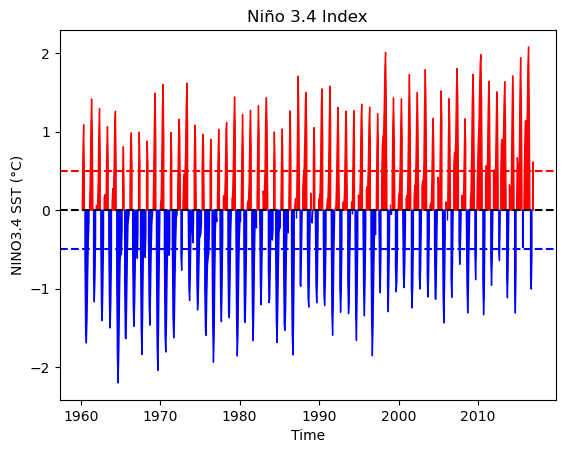

In [4]:
# 将NINO3.4指数进行3个月滑动平均 （错了，不知道如何修改）
window_size = 3
nino34 = np.convolve(sst_nino_mean, np.ones(window_size)/window_size, mode='valid')
nino34_anorm=nino34-np.mean(nino34)
nino34_anorm

times = ds['time']
# 创建一个新的布尔数组来标记正值和负值
positive_values = np.array(nino34_anorm) >= 0

# 创建一个具有相同长度的数组，其中正值为1，负值为-1
color_fill = np.where(positive_values, 1, -1)

# 绘制面积图
plt.fill_between(times[window_size-1:], nino34_anorm, where=color_fill>0, color='red')
plt.fill_between(times[window_size-1:], nino34_anorm, where=color_fill<0, color='blue')

# 添加水平线作为参考
plt.axhline(y=0.5, color='red', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.5, color='blue', linestyle='--')
# 设置图表标题和轴标签
plt.title('Niño 3.4 Index')
plt.xlabel('Time')
plt.ylabel('NINO3.4 SST (°C)')

# 显示图表
plt.show()

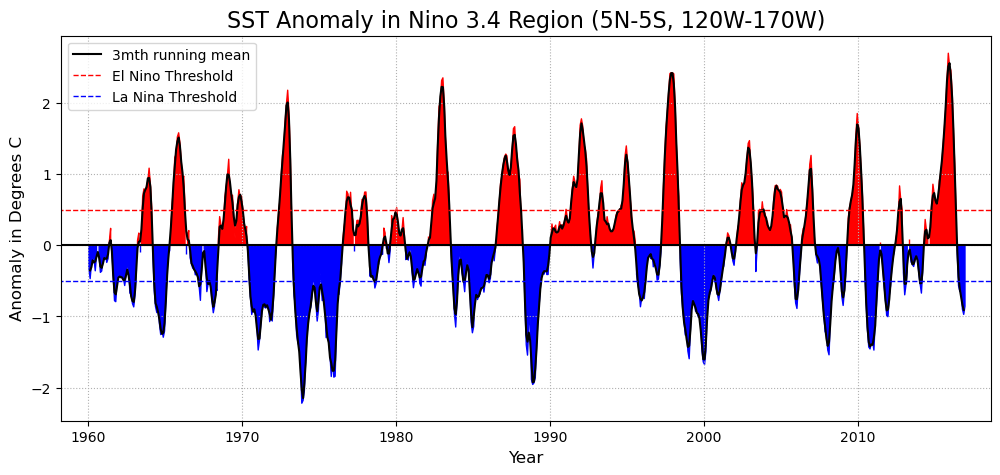

In [13]:
# 参考代码
nino34=ds_nino_anomaly.rolling(time=3,center=True).mean()
fig, ax = plt.subplots(1,1,figsize=(12,5))
x=ds_nino_anomaly.time
ax.plot(x,nino34,c='k',label='3mth running mean')
ax.fill_between(x,ds_nino_anomaly,where=(ds_nino_anomaly>0),color='r')
ax.fill_between(x,ds_nino_anomaly,where=(ds_nino_anomaly<0),color='b')
foo = plt.xticks()
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=0,color='k')
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=0.5,color='r',label='El Nino Threshold',ls='--',lw=1)
ax.hlines(xmin=foo[0].min(),xmax=foo[0].max(),y=-0.5,color='b',label='La Nina Threshold',ls='--',lw=1)
ax.set_xlim(foo[0].min()+3000,foo[0].max()-500,)
ax.set_xlabel('Year',fontsize=12)
ax.set_ylabel('Anomaly in Degrees C',fontsize=12)
ax.set_title('SST Anomaly in Nino 3.4 Region (5N-5S, 120W-170W)',fontsize=16)
plt.grid(ls=':')
plt.legend()
plt.show()

# PS2. Earth’s energy budget  
11/30  
1. 绘制按时间平均的全天况下的TOA长波、短波、太阳辐射的2D图，将三者加和并可视化确认他们的和与TOA净通量相等。——图片缺少图名和变量单位；题目有误，TOA净通量应等于太阳辐射减去长波和短波之和。3/5
2. 计算并确认TOA入射太阳辐射、出射长波、出射短波与示例图中的信息相符合，注意计算每个格网的实际面积。——计算目标不符合题意；没有计算格网的实际面积。2/10
3. 计算并绘制每1度纬度带上的净辐射总量，注意正确的单位。——没有根据不同格网的面积计算辐射总量，变量单位应为W；缺少图名和变量单位。2/5
4. 计算并绘制低云区和高云区的按时间平均的出射短波和长波辐射的2D合成图。注意低云区和高云区的定义。——云覆盖情况与辐射量是一一对应的，故应先筛选低云或高云区再按时间平均，见参考代码；图中缺少变量单位。3/5
5. 计算在高云区和低云区合成的短波和长波辐射的总体平均值，并回答云层对短波和长波辐射的总体影响是怎样的？——对题目理解有误，2.5应在2.4的基础上根据面积加权计算全球平均的辐射值，并回答问题，见参考代码。1/5

2. Earth’s energy budget
In this problem set, you will analyze top-of-atmosphere (TOA) radiation data from NASA’s CERES project. Read this post for more about Earth’s energy budget.
2.1 [5 points] Make a 2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux.


In [14]:
# Load the netCDF4 file
data = xr.open_dataset(r"C:\Program1\jupyter_notebook\ese5023\CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
# Show dataset info
#data.info()
# Check data variables
#data.data_vars
# Check the data
data

<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

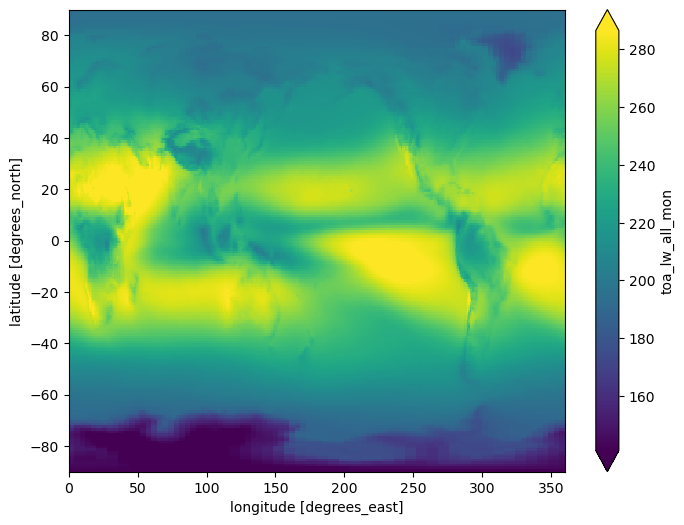

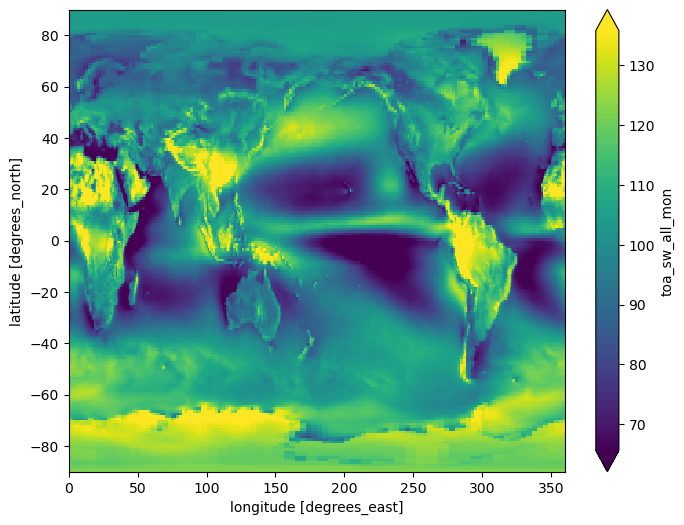

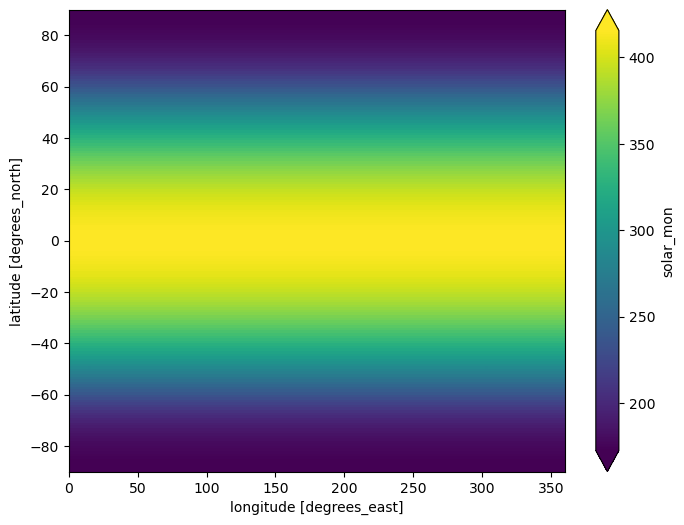

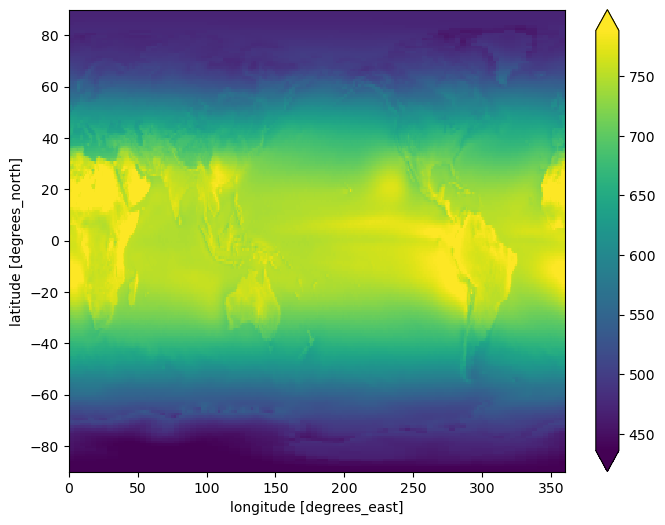

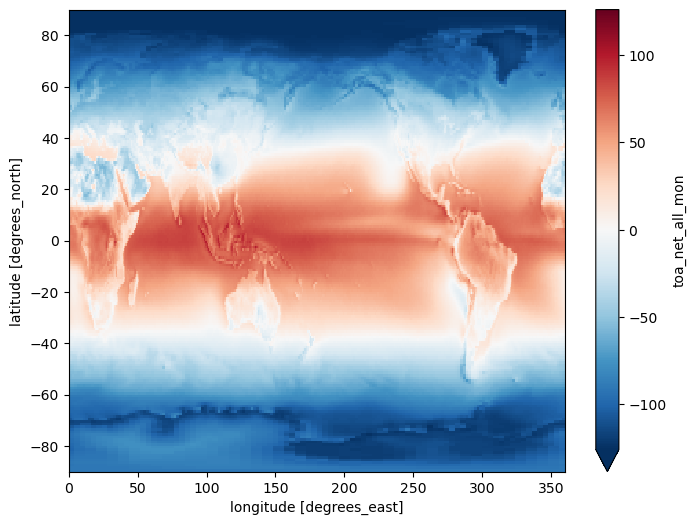

In [16]:
#提取数据

toa_lw_all_mon_mean= data.toa_lw_all_mon.mean(dim=['time']) 
toa_sw_all_mon_mean=data.toa_sw_all_mon.mean(dim=['time'])
toa_solar_mon_mean= data.solar_mon.mean(dim=['time']) 
# toa_all_mon=toa_sw_all_mean+toa_lw_all_mon_mean+toa_solar_mon_mean
toa_all_mon=toa_sw_all_mon_mean+toa_lw_all_mon_mean+toa_solar_mon_mean # TA corrected
toa_lw_all_mon_mean.plot(robust=True, figsize=(8, 6))
toa_sw_all_mon_mean.plot(robust=True, figsize=(8, 6))
toa_solar_mon_mean.plot(robust=True, figsize=(8, 6))
toa_all_mon.plot(robust=True, figsize=(8, 6))
data.toa_net_all_mon.mean(dim=['time']).plot(robust=True, figsize=(8, 6))

2.2 [10 points] Calculate and verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the cartoon above.
[Hint: Consider calculating the area of each grid]

In [17]:
 #the TOA incoming solar
in_solar=data.solar_mon.mean(dim=['time','lon','lat']) 
in_solar
# # # outgoing longwave
out_lw=data.toa_lw_all_mon.mean(dim=['time','lon','lat']) 
# #outgoing shortwave
out_sw=data.toa_sw_all_mon.mean(dim=['time','lon','lat'])
out_all=out_lw+out_sw
out_all

<xarray.DataArray ()>
array(327.05957, dtype=float32)

In [21]:
# 参考代码
weights_lat = np.cos(np.deg2rad(data.lat))
sr_weight = toa_solar_mon_mean.weighted(weights_lat)
lw_weight = toa_lw_all_mon_mean.weighted(weights_lat)
sw_weight = toa_sw_all_mon_mean.weighted(weights_lat)
print('solar radiations:',sr_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('outgoing longwave:',lw_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('outgoing shortwave:',sw_weight.mean(dim=('lon', 'lat')).values,'(W/m^2)')
print('Approximately match up with the cartoon, that is 340.4 incoming solar radiation, 239.9 total outgoing infrared radiation and 99.9 total reflected solar radiation (Unit: W/m^2).')

solar radiations: 340.28354 (W/m^2)
outgoing longwave: 240.2667 (W/m^2)
outgoing shortwave: 99.138596 (W/m^2)
Approximately match up with the cartoon, that is 340.4 incoming solar radiation, 239.9 total outgoing infrared radiation and 99.9 total reflected solar radiation (Unit: W/m^2).


2.3 [5 points] Calculate and plot the total amount of net radiation in each 1-degree latitude band. Label with correct units.

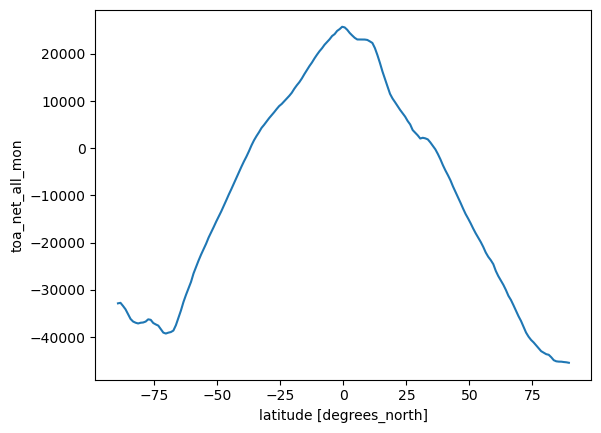

In [23]:
m_net=data.toa_net_all_mon.mean(dim=['time'])                            
m_net.sum(dim=['lon']).plot()                        

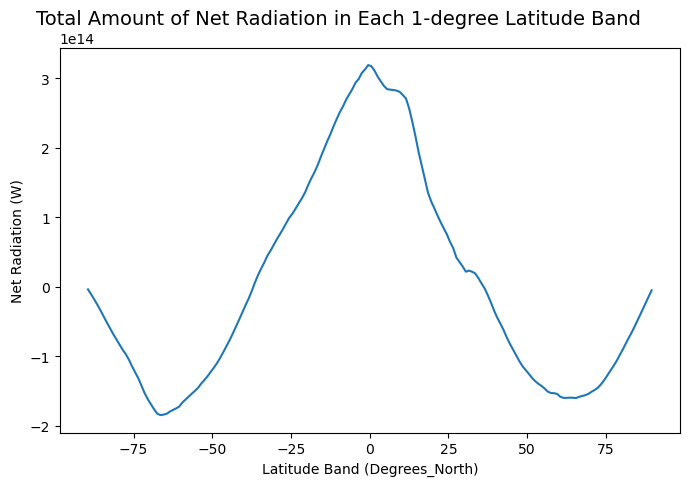

In [23]:
# 参考代码
"""
Area calculations: https://seaflux.readthedocs.io/en/stable/_modules/pyseaflux/area.html
-----------------
Calculates the area of pixels for a give grid input.
"""
def earth_radius(lat):
    """Calculate the radius of the earth for a given latitude

    Args:
        lat (array, float): latitude value (-90 : 90)

    Returns:
        array: radius in metres
    """
    from numpy import cos, deg2rad, sin

    lat = deg2rad(lat)
    a = 6378137
    b = 6356752
    r = (
        ((a ** 2 * cos(lat)) ** 2 + (b ** 2 * sin(lat)) ** 2)
        / ((a * cos(lat)) ** 2 + (b * sin(lat)) ** 2)
    ) ** 0.5

    return r
def area_grid(lat, lon, return_dataarray=False):
    """Calculate the area of each grid cell for given lats and lons

    Args:
        lat (array): latitudes in decimal degrees of length N
        lon (array): longitudes in decimal degrees of length M
        return_dataarray (bool, optional): if True returns xr.DataArray, else array

    Returns:
        array, xr.DataArray: area of each grid cell in meters

    References:
        https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import cos, deg2rad, gradient, meshgrid

    ylat, xlon = meshgrid(lat, lon)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=1))
    dlon = deg2rad(gradient(xlon, axis=0))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    if not return_dataarray:
        return area
    else:
        from xarray import DataArray

        xda = DataArray(
            area.T,
            dims=["lat", "lon"],
            coords={"lat": lat, "lon": lon},
            attrs=dict(
                long_name="Area per pixel",
                units="m^2",
                description=(
                    "Area per pixel as calculated by pySeaFlux. The non-"
                    "spherical shape of Earth is taken into account."
                ),
            ),
        )

        return xda
def get_area_from_dataset(dataarray, lat_name="lat", lon_name="lon"):
    """
    Calculate the grid cell area from a xr.Dataset or xr.DataArray.
    """
    da = dataarray
    x = da.lon.values
    y = da.lat.values

    area = area_grid(y, x, return_dataarray=True)

    return area

toa_net=data.toa_net_all_mon.mean(dim='time')
area=get_area_from_dataset(toa_net)
net_rad_lat_band=(toa_net*area).sum(dim='lon')
plt.figure(111,figsize=(8,5))
plt.plot(net_rad_lat_band.lat,net_rad_lat_band)
plt.xlabel('Latitude Band (Degrees_North)')
plt.ylabel('Net Radiation (W)')
plt.title('Total Amount of Net Radiation in Each 1-degree Latitude Band',x=0.45,fontsize=14)
plt.show()

2.4 [5 points] Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions. Here we define low cloud area as ≤25% and high cloud area as ≥75%. Your results should be 2D maps.

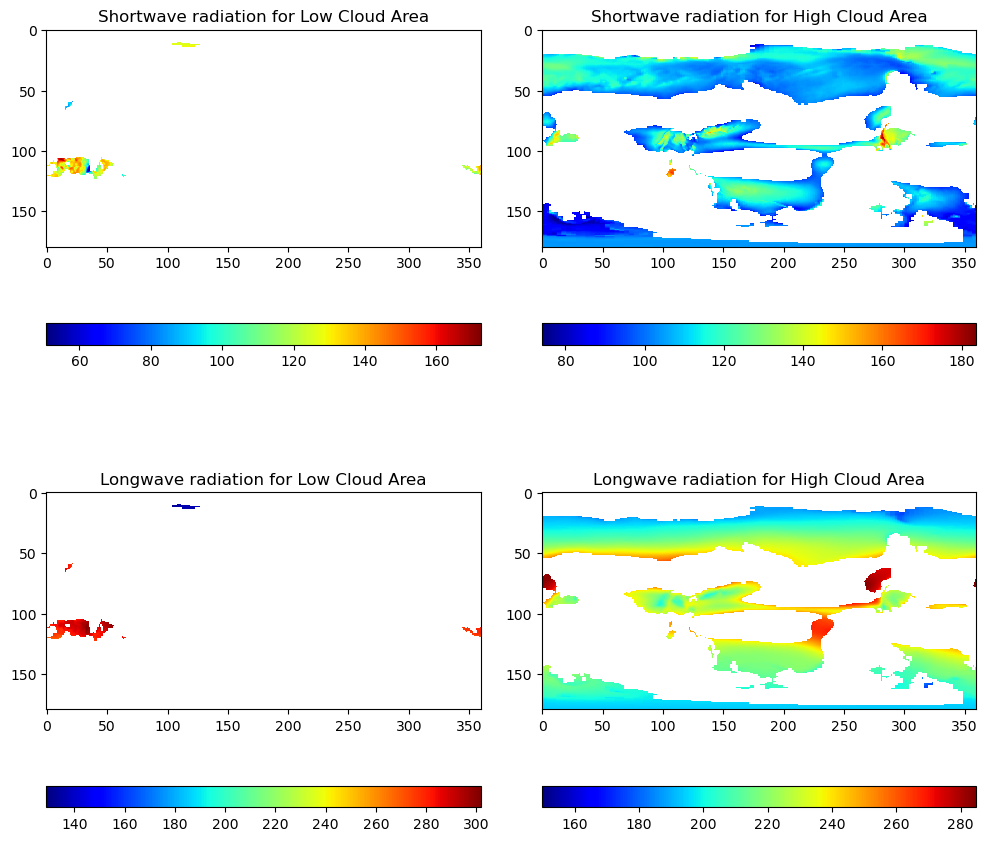

In [22]:
#读取数据
cloud_area_mean=data.cldarea_total_daynight_mon.mean(dim=['time'])
all_sw_mean=data.toa_sw_all_mon.mean(dim=['time'])
all_lw_mean=data.toa_lw_all_mon.mean(dim=['time'])
#记录low cloud area as ≤25% and high cloud area as ≥75%的位置
low_cloud_mask = cloud_area_mean <= 25
high_cloud_mask = cloud_area_mean >= 75
#寻找短波\长波辐射中低云区和高云区，通过将非云区域的元素遮罩（mask）掉
swall_low_cloud_composite = np.ma.array(all_sw_mean, mask=~low_cloud_mask)
swall_high_cloud_composite =np.ma.array(all_sw_mean, mask=~high_cloud_mask)
lwall_low_cloud_composite= np.ma.array(all_lw_mean, mask=~low_cloud_mask)
lwall_high_cloud_composite= np.ma.array(all_lw_mean,mask=~high_cloud_mask)
#画图
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(swall_low_cloud_composite, cmap='jet')
plt.title('Shortwave radiation for Low Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(222)
plt.imshow(swall_high_cloud_composite, cmap='jet')
plt.title('Shortwave radiation for High Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(223)
plt.imshow(lwall_low_cloud_composite, cmap='jet')
plt.title('Longwave radiation for Low Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(224)
plt.imshow(lwall_high_cloud_composite, cmap='jet')
plt.title('Longwave radiation for High Cloud Area')
plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.show()
                                        

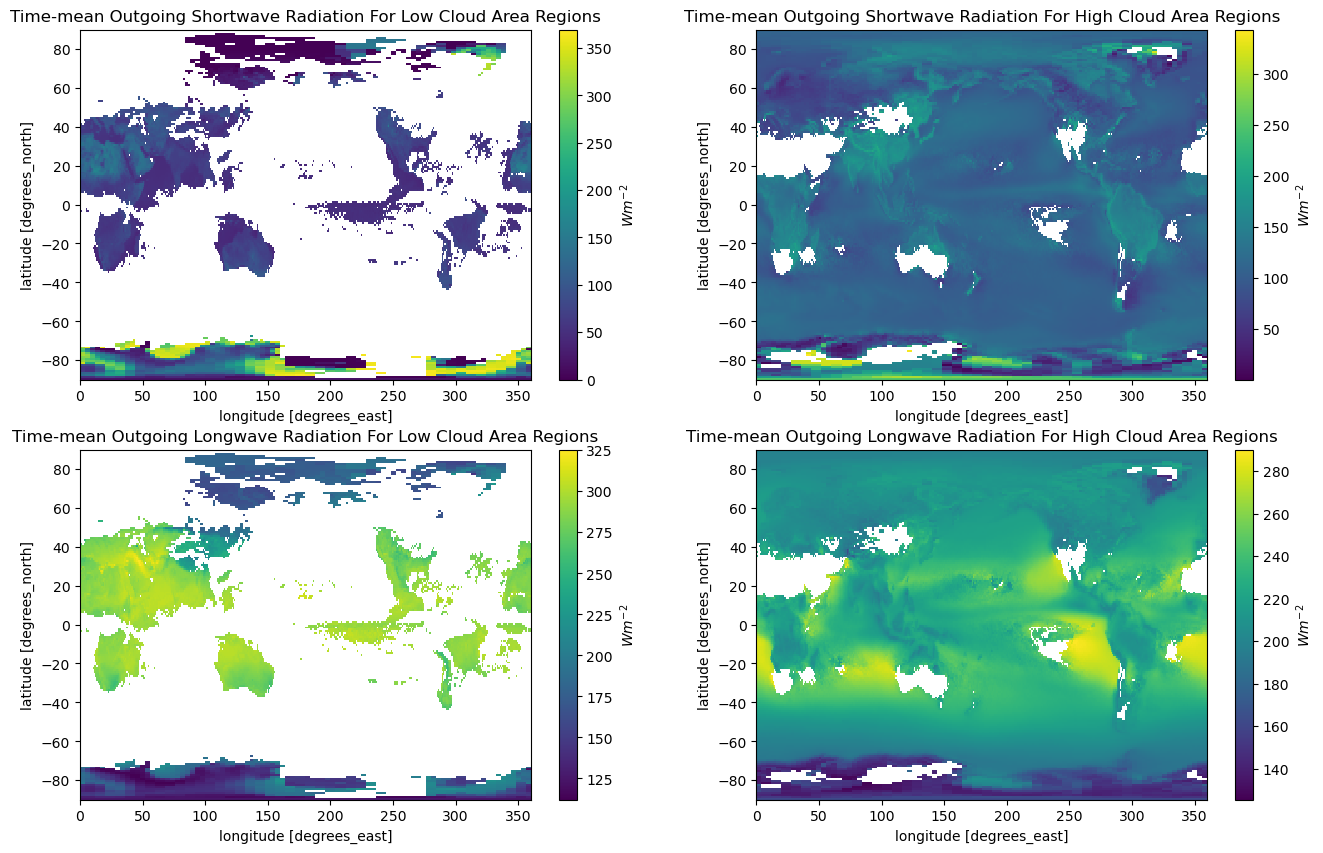

In [28]:
# 参考代码
lc_shortwave=data.toa_sw_all_mon.where(data.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_shortwave=data.toa_sw_all_mon.where(data.cldarea_total_daynight_mon>=75).mean(dim='time')

lc_longwave=data.toa_lw_all_mon.where(data.cldarea_total_daynight_mon<=25).mean(dim='time')
hc_longwave=data.toa_lw_all_mon.where(data.cldarea_total_daynight_mon>=75).mean(dim='time')
# lc_longwave,hc_longwave

fig,axs =plt.subplots(2,2,figsize=(16,10))
axs=axs.flatten()

fig1=lc_shortwave.plot(ax=axs[0],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[0].set_title('Time-mean Outgoing Shortwave Radiation For Low Cloud Area Regions')

fig2=hc_shortwave.plot(ax=axs[1],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[1].set_title('Time-mean Outgoing Shortwave Radiation For High Cloud Area Regions')

fig3=lc_longwave.plot(ax=axs[2],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[2].set_title('Time-mean Outgoing Longwave Radiation For Low Cloud Area Regions')

fig4=hc_longwave.plot(ax=axs[3],cbar_kwargs={'label':'${Wm^{-2}}$'})
axs[3].set_title('Time-mean Outgoing Longwave Radiation For High Cloud Area Regions')

plt.show()

2.5 [5 points] Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. What is the overall effect of clouds on shortwave and longwave radiation?

In [24]:
cloud_area_mean=data.cldarea_total_daynight_mon.mean(dim=['time'])
cre_sw_mean=data.toa_cre_sw_mon.mean(dim=['time'])
cre_lw_mean=data.toa_cre_lw_mon.mean(dim=['time'])

In [25]:
#记录low cloud area as ≤25% and high cloud area as ≥75%的位置
low_cloud_mask = cloud_area_mean <= 25
high_cloud_mask = cloud_area_mean >= 75

In [26]:
#寻找短波\长波辐射中低云区和高云区，通过将非云区域的元素遮罩（mask）掉,并进行区域平均
swcre_low_cloud_composite = np.mean(np.ma.array(cre_sw_mean, mask=~low_cloud_mask))
scre_high_cloud_composite = np.mean(np.ma.array(cre_sw_mean, mask=~high_cloud_mask))
lwcre_low_cloud_composite= np.mean(np.ma.array(cre_lw_mean, mask=~low_cloud_mask))
lwcre_high_cloud_composite= np.mean(np.ma.array(cre_lw_mean,mask=~high_cloud_mask))
lwcre_high_cloud_composite

29.668634441384736

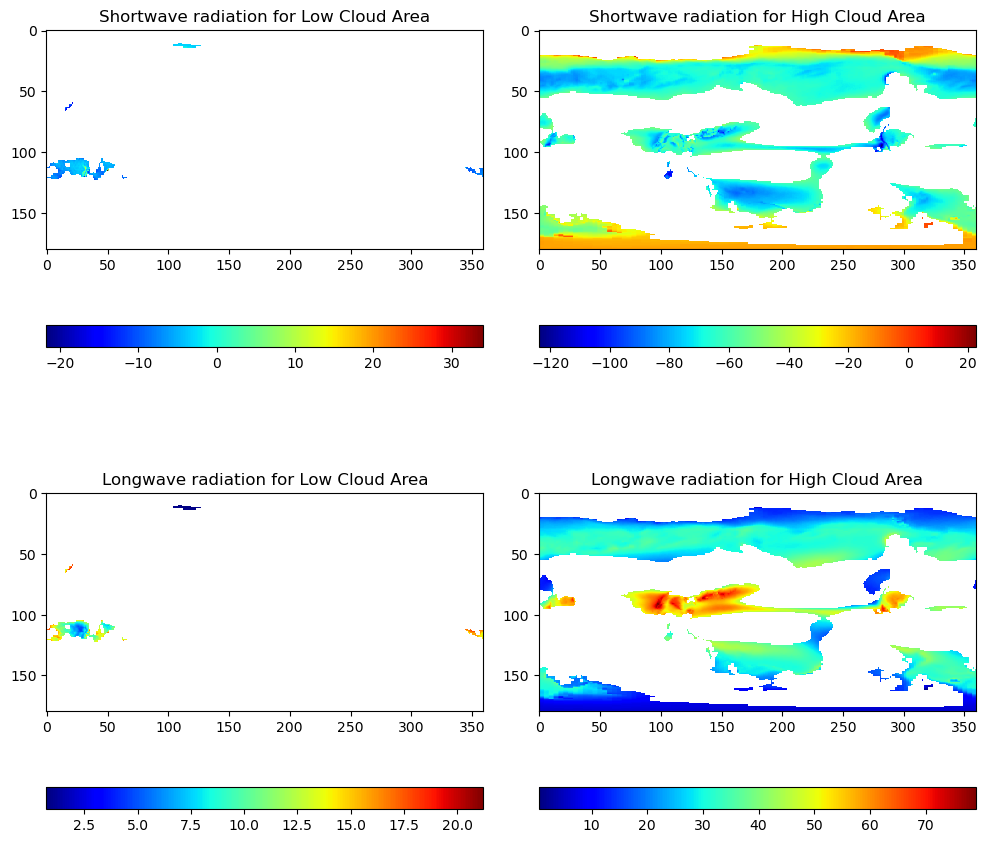

In [27]:
#寻找短波\长波辐射中低云区和高云区，通过将非云区域的元素遮罩（mask）掉，我们可以得到只包含高云和低云区域的合成图像。
sw_low_cloud_composite = np.ma.array(cre_sw_mean, mask=~low_cloud_mask)
sw_high_cloud_composite = np.ma.array(cre_sw_mean, mask=~high_cloud_mask)
lw_low_cloud_composite= np.ma.array(cre_lw_mean, mask=~low_cloud_mask)
lw_high_cloud_composite= np.ma.array(cre_lw_mean,mask=~high_cloud_mask)

plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.imshow(sw_low_cloud_composite, cmap='jet')
plt.title('Shortwave radiation for Low Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(222)
plt.imshow(sw_high_cloud_composite, cmap='jet')
plt.title('Shortwave radiation for High Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(223)
plt.imshow(lw_low_cloud_composite, cmap='jet')
plt.title('Longwave radiation for Low Cloud Area')
plt.colorbar(orientation='horizontal')
plt.subplot(224)
plt.imshow(lw_high_cloud_composite, cmap='jet')
plt.title('Longwave radiation for High Cloud Area')
plt.colorbar(orientation='horizontal')
plt.tight_layout()
plt.show()


In [29]:
# 参考代码
weights1 = np.cos(np.deg2rad(lc_shortwave.lat))
lc_mean_shortwave=lc_shortwave.weighted(weights1).mean()
hc_mean_shortwave=hc_shortwave.weighted(weights1).mean()
lc_mean_longwave=lc_longwave.weighted(weights1).mean()
hc_mean_longwave=hc_longwave.weighted(weights1).mean()
print(f'The global mean values of shortwave radiation in high and low cloud regions are {hc_mean_shortwave:f} and {lc_mean_shortwave:f} Wm-2 respectively.')
print(f'The global mean values of longwave radiation in high and low cloud regions are {hc_mean_longwave:f} and {lc_mean_longwave:f} Wm-2 respectively.')
print('In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.')

The global mean values of shortwave radiation in high and low cloud regions are 113.157120 and 75.494324 Wm-2 respectively.
The global mean values of longwave radiation in high and low cloud regions are 225.708435 and 270.853027 Wm-2 respectively.
In high cloud area regions, shortwave radiation is stronger while longwave radiation is weaker, which means clouds would reflect shortwave and reserve longwave.


# PS3. Explore a netCDF dataset  
8/10  
1. 绘制某个变量的时间序列，注意去掉月尺度的季节性周期。——没有去除月尺度的季节性周期；图片缺少图名。4/5
2. 用该数据集绘制至少5种不同的图。——图片缺少图名。4/5

3. Explore a netCDF dataset
Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format, and have temporal information.

3.1 [5 points] Plot a time series of a certain variable with monthly seasonal cycle removed.

In [35]:
# Load the netCDF4 file
hgt_data = xr.open_dataset("hgt.2017z.nc", engine="netcdf4")
# Check the data
hgt_data


<xarray.Dataset>
Dimensions:    (level: 17, lat: 73, lon: 144, time: 349, nbnds: 2)
Coordinates:
  * level      (level) float32 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time       (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2017-12-15
Dimensions without coordinates: nbnds
Data variables:
    hgt        (time, level, lat, lon) float32 ...
    time_bnds  (time, nbnds) float64 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

In [73]:
#选择5月,划定区域（120-130E,40-50N）,500hPa位势高度场
hgt500Data=hgt_data['hgt']#.sel(lat=slice(40, 50))#,lon=slice(300,310),level=500) #,time=slice("2017-05-01T00:00:00.000000000", "2017-05-31T00:00:00.000000000")
# 选择5月份的数据
hgt_may = hgt500Data.sel(time=hgt500Data['time.month']== 5)
hgt_box = hgt_may.sel(lon=slice(120, 130)).isel(lat=slice(16,21))
#计算东北冷涡指数
col_index=hgt_box.isel(level=5).mean(dim=['lat','lon'])
col_index


<xarray.DataArray 'hgt' (time: 31)>
array([5673.49, 5714.63, 5679.78, 5561.27, 5427.2 , 5382.64, 5502.76,
       5618.77, 5621.95, 5581.25, 5528.31, 5471.44, 5505.69, 5562.29,
       5597.18, 5603.8 , 5667.44, 5725.24, 5727.13, 5710.71, 5677.85,
       5629.77, 5552.97, 5535.8 , 5601.53, 5653.29, 5687.55, 5630.54,
       5558.36, 5537.69, 5521.53], dtype=float32)
Coordinates:
    level    float32 500.0
  * time     (time) datetime64[ns] 2017-05-01 2017-05-02 ... 2017-05-31

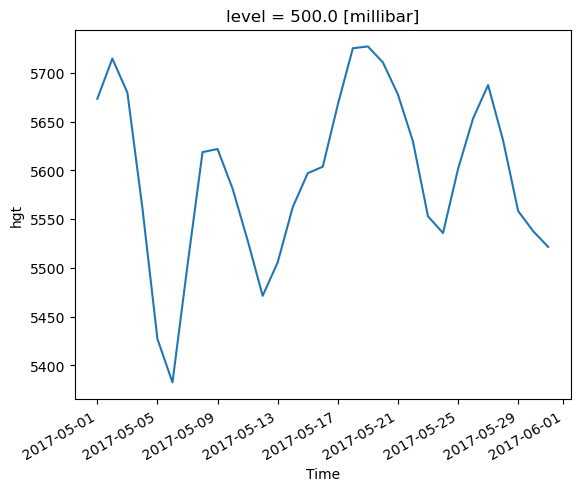

In [70]:
#画东北冷涡指数的时间序列图
col_index.plot()

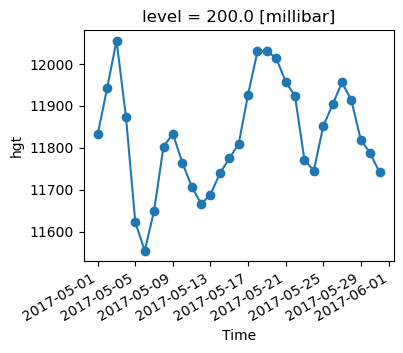

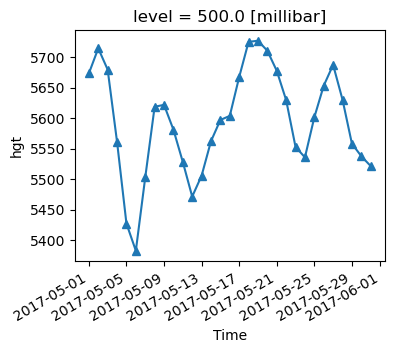

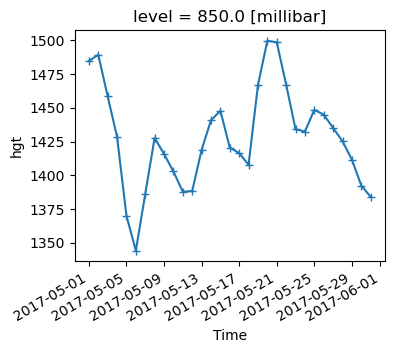

In [87]:
#画关键区域的不同高层的 时间序列
hgt_box.sel(level=200).mean(dim=['lat','lon']).plot(marker="o", size=3)
hgt_box.sel(level=500).mean(dim=['lat','lon']).plot(marker="^", size=3)
hgt_box.sel(level=850).mean(dim=['lat','lon']).plot(marker="+", size=3)

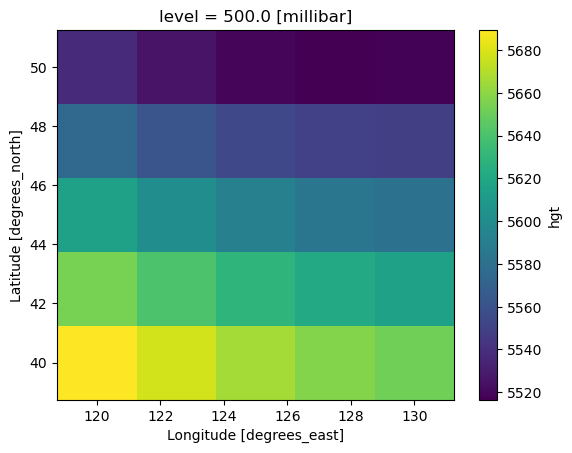

In [75]:
#画关键区域的500hpa 2Dmap
hgt_box.isel(level=5).mean(dim=['time']).plot()

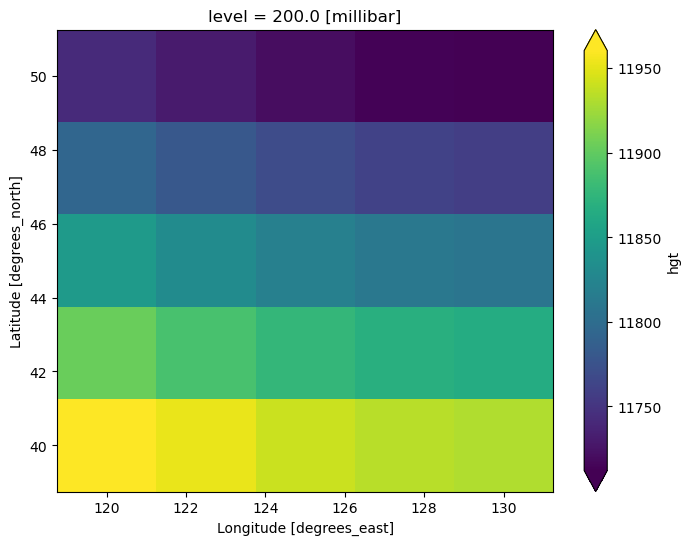

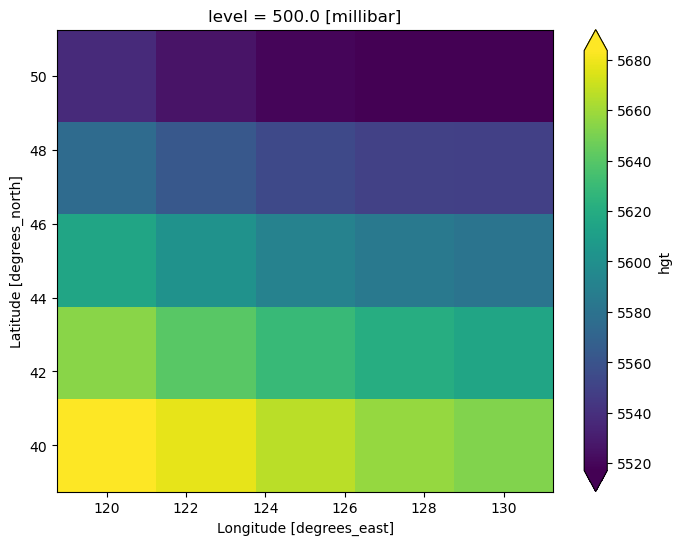

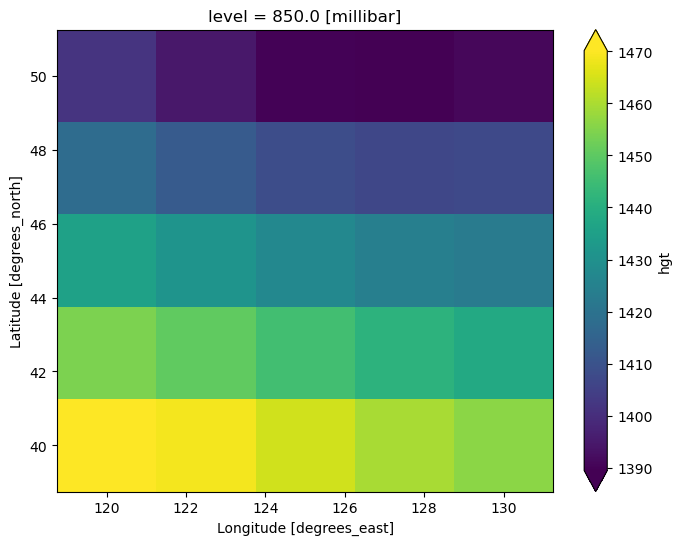

In [82]:
#画关键区域的不同高层的 2Dmap
hgt_box.sel(level=200).mean(dim=['time']).plot(robust=True, figsize=(8, 6))

hgt_box.sel(level=500).mean(dim=['time']).plot(robust=True, figsize=(8, 6))

hgt_box.sel(level=850).mean(dim=['time']).plot(robust=True, figsize=(8, 6))


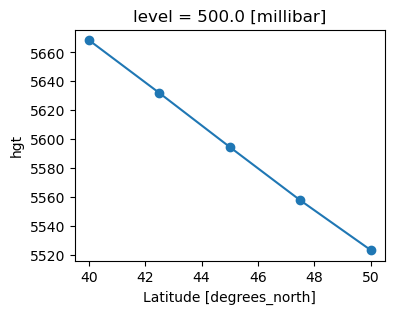

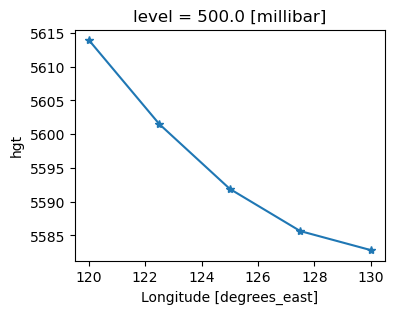

In [91]:
#计算每个经度和纬度上的500hgt位势高度场均值
hgt_box.isel(level=5).mean(dim=['time']).mean(dim=['lon']).plot(marker="o", size=3)  
hgt_box.isel(level=5).mean(dim=['time']).mean(dim=['lat']).plot(marker="*", size=3)  
# m_net=data.toa_net_all_mon.mean(dim=['time'])                            
# m_net.sum(dim=['lon']).plot()   